# Challenge: Preparing a dataset for modeling
## Thinkful Unit 2, Lesson 1

## Instructions
Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

## Datasets: Trade & National Material Capabilities (Both from Correlates of War)

## Variables

- State [CAT]
- Year [CONT, INT]
- Imports (in USD millions) [CONT, RAT]
- Exports (in USD millions) [CONT, RAT]
- Iron and Steel Production (in thousand of tons) [CONT, RAT]
- Military Expenditure (in USD thousands) [CONT, RAT]
- Military Personnel (thousands) [CONT, RAT]
- Energy Consumption (in thousands of coal-ton equivalents) [CONT, RAT]
- Total Population (in thousands) [CONT, RAT]
- Urban Population (from cities with populations greater than 100,000; in thousands) [CONT, RAT]
- CINC (Composite Index of National Capability) Score [CONT, RAT]


## Possible Research Questions:
### Target Variable: Military Expenditure

1. What factors can best predict how much money a state will spend on military a given year? 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import math

%matplotlib inline

cow = pd.read_csv('COW.csv')
nmc = pd.read_csv('NMC.csv')

# Merge the two datasets together by country and year. Keep only relevant columns.
df = pd.merge(cow, nmc, on=['ccode','year'], how="left")
df = df[['statename', 'year', 'imports', 'exports', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']]

## Summary Statistics
### By Variable

In [2]:
df.describe()[['imports', 'exports', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']]

,imports,exports,milex,milper,irst,pec,tpop,upop,cinc
count,1.286200e+04,1.358900e+04,1.328300e+04,13283.000000,13283.000000,1.328300e+04,1.328300e+04,13283.000000,1.328300e+04
mean,2.093562e+04,1.969286e+04,2.956466e+06,169.303320,3651.317398,5.596612e+04,2.875967e+04,5677.164921,1.097818e-02
std,1.076697e+05,9.739727e+04,2.209754e+07,547.045714,19339.019844,2.465351e+05,9.871279e+04,21549.520318,3.223964e-02
min,3.141340e-02,2.000000e-03,-9.000000e+00,-9.000000,-9.000000,-9.000000e+00,9.000000e+00,-9.000000,2.440000e-07
25%,1.293500e+02,7.820000e+01,3.185500e+03,5.000000,0.000000,2.440000e+02,2.102000e+03,150.000000,3.859500e-04
50%,6.896991e+02,4.555938e+02,4.738300e+04,25.000000,0.000000,3.050000e+03,6.360000e+03,830.000000,1.456400e-03
75%,4.814125e+03,3.336458e+03,5.086050e+05,111.000000,619.500000,2.349100e+04,1.874900e+04,3224.500000,5.880450e-03
max,2.519304e+06,2.818427e+06,6.936000e+08,12500.000000,731040.000000,5.333707e+06,1.377065e+06,612933.000000,3.838635e-01


### Mean Imports by Year

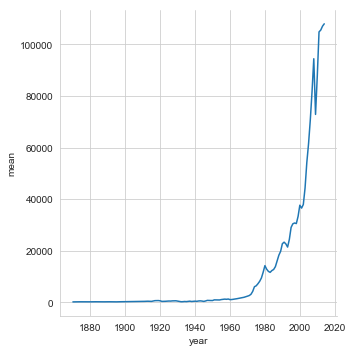

In [3]:
imports_year = df.groupby('year').describe()['imports']
imports_year = imports_year.reset_index().dropna()

sns.set_style('whitegrid')
ax = sns.relplot(x='year', y='mean', kind='line',data=imports_year)
# ax.set_title('Mean Imports by Year')

### Mean Military Expenditure by Year

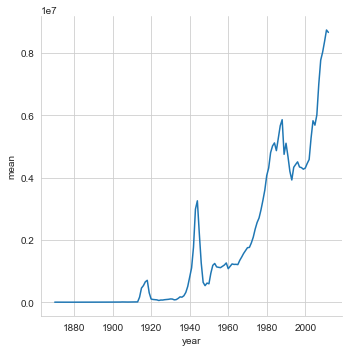

In [4]:
milex_year = df.groupby('year').describe()['milex']
milex_year = milex_year.reset_index().dropna()

ax = sns.relplot(x='year', y ='mean', kind='line', data=milex_year)
# ax.set_title = ('Military Expenditure by Year (in USD thousands)')


### Mean Military Expenditure by State

In [5]:
milex_ctry = df.groupby('statename').describe()['milex']
milex_ctry = milex_ctry.reset_index()

milex_ctry.sort_values(by='mean', ascending=False).head(15)

,statename,count,mean,std,min,25%,50%,75%,max
191,United States of America,143.0,9.932982e+07,1.643194e+08,9074.0,51053.50,10960998.0,95969000.00,693600000.0
149,Russia,143.0,4.183913e+07,6.947043e+07,19893.0,61064.00,6884227.0,51797000.00,317900000.0
69,German Federal Republic,36.0,1.312220e+07,9.988834e+06,1630889.0,4896419.00,10473012.0,21649754.00,35610000.0
38,China,143.0,1.226696e+07,2.079116e+07,-9.0,-9.00,214511.0,20949960.00,102643000.0
190,United Kingdom,143.0,1.183095e+07,1.716175e+07,16177.0,62482.00,4383177.0,16628209.50,63258000.0
70,Germany,99.0,1.120968e+07,1.690697e+07,13570.0,35659.00,146845.0,28412000.00,50736000.0
64,France,142.0,1.092918e+07,1.717852e+07,23643.0,45206.00,1240807.0,14604183.75,67185000.0
154,Saudi Arabia,86.0,1.018782e+07,1.360442e+07,-9.0,1124.75,382211.0,18414250.00,56724000.0
91,Japan,137.0,9.443959e+06,1.668666e+07,320.0,17721.00,420767.0,9297521.00,59834000.0
82,India,66.0,8.117046e+06,9.710825e+06,218680.0,1280823.00,4292301.0,11584250.00,38278000.0


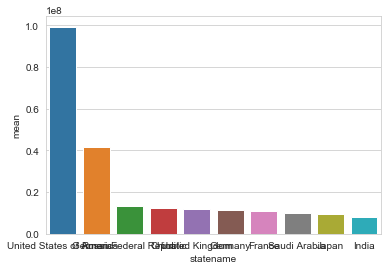

In [6]:
top_10 = milex_ctry.sort_values(by='mean', ascending=False).head(10)
sns.barplot(x='statename', y='mean', data=top_10)

## Data Exploration

### Univariate Exploration 

#### Imports

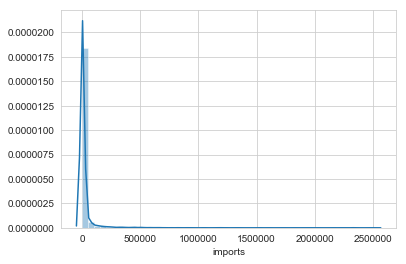

In [7]:
sns.distplot(df['imports'].dropna())

#### Military Expenditure

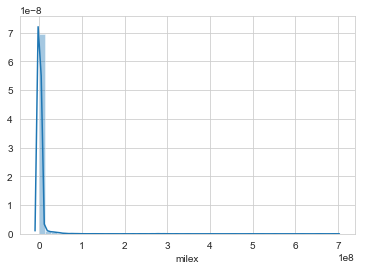

In [8]:
sns.distplot(df['milex'].dropna())

#### Top Five Military Expenditures

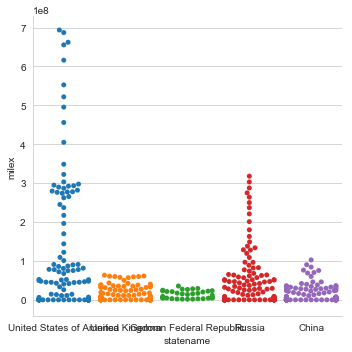

In [9]:
top_5_list = ['United States of America', 'Russia', 'German Federal Republic', 'China', 'United Kingdom']
top_5_ex = df[df['statename'].isin(top_5_list)]

sns.catplot(x='statename', y='milex', kind='swarm',data=top_5_ex)

### Bivariate Exploration

#### Correlation Map

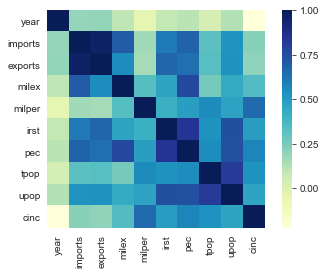

In [10]:
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")

#### Plot Bivariate Relationships using Scaled Data

In [11]:
df_num = df.select_dtypes(include=[np.number]).dropna()
names=df_num.columns
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

c:\users\kathy trieu\desktop\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Relationship between state exports and military expenditure

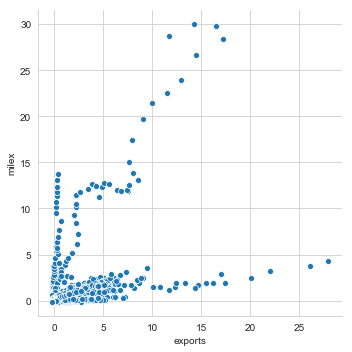

In [12]:
sns.relplot(x='exports', y='milex', data=df_scaled)

#### Relationship between total population and military expenditure

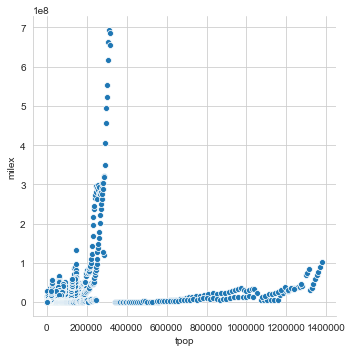

In [13]:
sns.relplot(x='tpop', y='milex', data=df.dropna())

## Feature Engineering


## Features
#### Freedom Status
1. "Free" States (determined by Freedom House)
2. "Partly Free" States (determined by Freedom House) and "Not Free" States (determined by Freedom House)

I want to investigate the effect a state's freedom status on it's military power and dependency. 

#### Regions
3. Asia
4. North America
5. South and Central America
6. Europe
7. Africa

I want to investigate whether trends exist per region.

#### State Characteristics
8. Total population above 200,000,000
9. Total population below or equal to 200,000,000

The graph below shows two clear clusters. I want to examine both more closely.

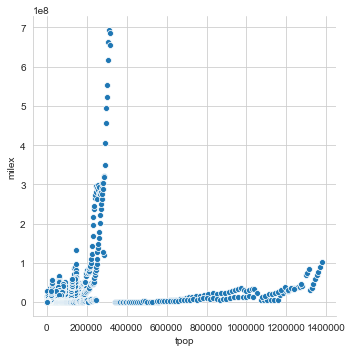

In [14]:
sns.relplot(x='tpop', y='milex', data=df.dropna())

#### Time Periods
10. Post-Cold War Time Period
11. Cold-War Time Period
12. Pre-Cold War Time Period

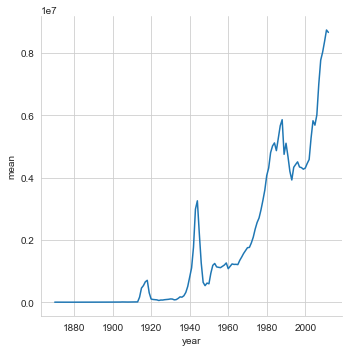

In [15]:
milex_year = df.groupby('year').describe()['milex']
milex_year = milex_year.reset_index().dropna()

ax = sns.relplot(x='year', y ='mean', kind='line', data=milex_year)

The graph reveals mean military expenditure per state increased drastically around 1990. Additionally, expenditure increased during time periods when there were large wars ongoing and decreased when those end. 


#### Trade
13. net imports 

Net imports/exports are a clearer way to examine the flow of international spending on military than absolute spending on imports and exports alone.

## Prepare Features for Selection

#### Features 1 and 2: Freedom Status

In [16]:
df['statename'] = df['statename'].astype(str)
free_states = ['Denmark', 'Palau', 'St. Vincent and Grenadines','Japan','Uruguay','Australia','Dominica',
'Austria','United Kingdom','Finland','Taiwan','Bahamas','Kiribati','Slovenia','Cape Verde','Marshall Islands',
'Netherlands','New Zealand','Sweden','Iceland','Portugal','Tuvalu','Switzerland','Barbados',
'Canada','Costa Rica','Estonia','Belgium','Micronesia','Germany','Spain','Norway', 'Andorra','Ireland','San Marino','Chile','Lithuania','Cyprus','Luxembourg',
'St. Kitts and Nevis','Czech Republic','Italy','St. Lucia','Panama','United States of America','Slovakia','Malta','France','Mauritius',
'Belize','Croatia','Ghana','Greece','Mongolia','Grenada','Liechtenstein','Argentina','Jamaica','Tonga','Nauru','Poland',
'Solomon Islands','Brazil','Romania','Latvia','South Africa','South Korea','Bulgaria','Northern Cyprus','Benin','Samoa','Monaco','Trinidad and Tobago',
'Sao Tome and Principe','Antigua & Barbuda','Vanuatu','Senegal','Guyana', 'Surname','Botswana','Namibia','Peru','El Salvador','India','Tunisia','Israel','Timor-Leste']

In [17]:
df['statename'] = df.replace('East Timor', 'Timor-Leste')

In [18]:
def freedom_function(row):
    if row['statename'] in free_states:
        return '1'
    return '0'

df['free'] = df.apply(lambda row: freedom_function(row), axis=1)

In [19]:
# Check for accuracy
#not_free = df[df['free'] == "0"]
#print("partly free and not free states: ", not_free['statename'].unique())
#free_test = df[df['free'] == "1"]
#print("free states: ", free_test['statename'].unique())

#### Features 3-7: Regions (Asia, Africa, North America, South America, Europe, Australia and Oceania)


In [20]:
# make lists of each region and the states that belong to them. 
# make dummy variables for each region.

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Bhutan', 'Brunei Darussalam', 'Brunei', 'Cambodia','China',
    'Cyprus', 'Georgia','Hong Kong','India', 'Iran', 'Iraq', 'Israel', 'Indonesia','Japan', 'Jordan', 'Kazakhstan','Kuwait','North Korea','South Korea',
    'Kyrgyzstan','Laos','Lebanon','Macao','Malaysia','Maldives','Mongolia','Myanmar','Burma','Nepal','Pakistan',
    'Philippines', 'Palestine', 'Qatar', 'Singapore','Sri Lanka','Saudi Arabia', 'Syria', 'Ceilan','Taiwan','Tajikistan','North Korea', 'Thailand','Timor-Leste',
    'Turkmenistan','Uzbekistan','Vietnam', 'Oman', 'United Arab Emirates','Yemen']
africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cape Verde',
          'Cameroon','Central African Republic','Chad','Comoros','Democratic Republic of the Congo',
          'Republic of the Congo','Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Eswatini', 'Swaziland',
          'Ethiopia', 'Gabon','Gambia','Ghana','Guinea','Guinea-Bissau', 'Ivory Coast', 'Kenya','Lesotho','Liberia','Libya',
          'Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria',
          'Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan',
          'Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']
north_america = ['Antigua & Barbuda','Bahamas','Barbados','Belize',
    'Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala',
    'Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','St. Kitts and Nevis','St. Lucia','Saint Vincent and the Grenadines',
    'Trinidad and Tobago','United States of America', 'Barbados', 'St. Vincent and the Grenadines', 'Anguilla''Aruba','Bermuda','Bonaire','British Virgin Islands',
    'Cayman Islands','Clipperton Island','Curacao','Greenland','Guadeloupe','Martinique','Montserrat','Navassa Island',
    'Puerto Rico','Saba','Saint Barthelemy','Saint Martin','Saint Pierre and Miquelon','Saint Eustatius','Saint Marten',
    'Turks and Caicos Islands','US Virgin Islands']
south_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru',
    'Suriname','Uruguay','Venezuela', 'Falkland Islands','French Guiana',
    'South Georgia and the South Sandwich Islands',]
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
          'Bulgaria','Croatia','Cyprus','Czechia','Czech Republic', 'Czechoslovakia','Denmark','Estonia','Finland','France','Georgia','Germany',
          'Greece','German Democratic Republic','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
          'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','Macedonia','Norway','Poland',
          'Portugal','Romania','Russia', 'San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland',
          'Turkey','Ukraine','United Kingdom', 'Yugoslavia']
australia = ['Australia','Fiji','Kiribati','Marshall Islands','Federated States of Micronesia','Micronesia',
    'Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu',
    'American Samoa','Cook Islands','French Polynesia','Guam','New Caledonia','Niue','Norfolk Island',
    'Northern Mariana Island','Pitcairn Islands','Tokelau','Wake Island','Wallis and Futuna']

regions = [asia, africa, north_america, south_america, europe, australia]


In [21]:
def asia_function(row):
    if row['statename'] in asia:
        return '1'
    return '0'

df['asia'] = df.apply(lambda row: asia_function(row), axis=1)

def africa_function(row):
    if row['statename'] in africa:
        return '1'
    return '0'

df['africa'] = df.apply(lambda row: africa_function(row), axis=1)

def europe_function(row):
    if row['statename'] in europe:
        return '1'
    return '0'

df['europe'] = df.apply(lambda row: europe_function(row), axis=1)

def australia_function(row):
    if row['statename'] in australia:
        return '1'
    return '0'

df['australia'] = df.apply(lambda row: australia_function(row), axis=1)

def south_am_function(row):
    if row['statename'] in south_america:
        return '1'
    return '0'

df['south_am'] = df.apply(lambda row: south_am_function(row), axis=1)

def north_am_function(row):
    if row['statename'] in north_america:
        return '1'
    return '0'

df['north_am'] = df.apply(lambda row: north_am_function(row), axis=1)

In [22]:
def region_function(row):
    if row['asia'] == '1':
        return "asia"
    if row['africa'] == '1':
        return "africa"
    if row['north_am'] == '1':
        return "north_am"
    if row['europe'] == '1':
        return "europe"
    if row['south_am'] == '1':
        return "south_am"
    if row['australia'] == '1':
        return "australia"
    return ""

df['region'] = df.apply(lambda row: region_function(row), axis=1)

#### Features 8-9: State Total population above (1) or below (or equal to) 1.2 billion (0)

In [23]:
def pop_function(row):
    if row['tpop'] > 200000:
        return '1'
    if row['tpop'] <= 200000:
        return '0'

df['pop_dummy'] = df.apply(lambda row: pop_function(row), axis=1)

#### Features 10-12: Time Period (Pre-Cold War, Cold War, Post-Cold War)

In [87]:
def pre_cw_function(row):
    if row['year'] < 1946:
        return '1'
    return '0'

def cw_function(row):
    if 1946 <= row['year'] < 1990:
        return '1'
    return '0'

def post_cw_function(row):
    if row['year'] >= 1990:
        return '1'
    return '0'


df['pre_cw'] =  df.apply(lambda row: pre_cw_function(row), axis=1)
df['cw'] = df.apply(lambda row: cw_function(row), axis=1)
df['post_cw'] = df.apply(lambda row: post_cw_function(row), axis=1)


def cw_function(row):
    if row['post_cw'] == '1':
        return "post_cw"
    if row['cw'] == '1':
        return "cw"
    if row['pre_cw'] == '1':
        return "pre-cw"
    return ""

df['time_period'] = df.apply(lambda row: cw_function(row), axis=1)


#### Feature 13: Trade

In [25]:
df['net_import'] = df['imports']-df['exports']

## Data Exploration with Features

In [26]:
df['tpop'] = df['tpop'].astype(float)

In [106]:
sns.set_style('white')
sns.set_palette("hls")
sns.set_context('talk')

In [64]:
post_cw_df = df[df['post_cw'] == '1']
pre_cw_df = df[df['pre_cw'] == '1']
cw_df = df[df['cw'] == '1']

asia_df = df[df['region'] == 'asia']
australia_df = df[df['region'] == 'australia']
africa_df = df[df['region'] == 'africa']
europe_df = df[df['region'] == 'europe']
south_am_df = df[df['region'] == 'south_am']
north_am_df = df[df['region'] == 'north_am']

us_df = df[df['statename'] == 'United States of America']

smallpop = df[df['pop_dummy'] == "0"]
bigpop = df[df['pop_dummy'] == "1"]

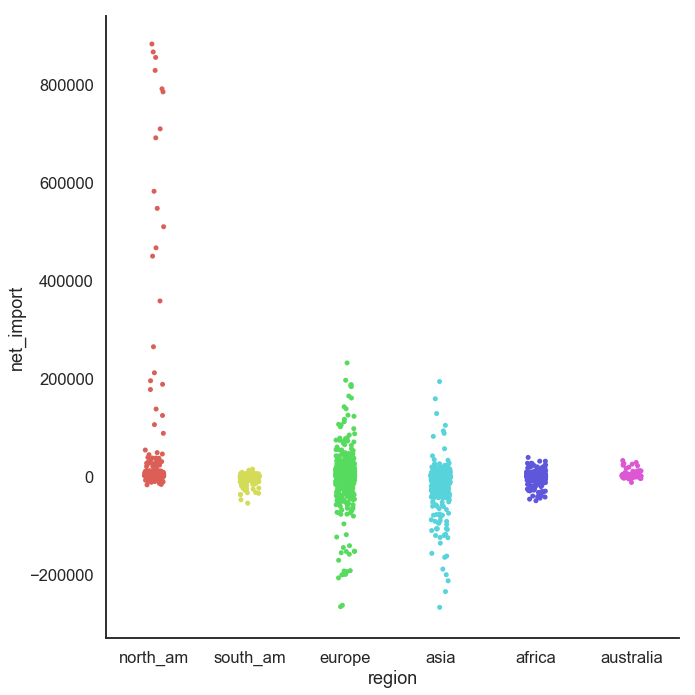

In [142]:
sns.catplot(x="region", y="net_import", height=10,data=post_cw_df.dropna());

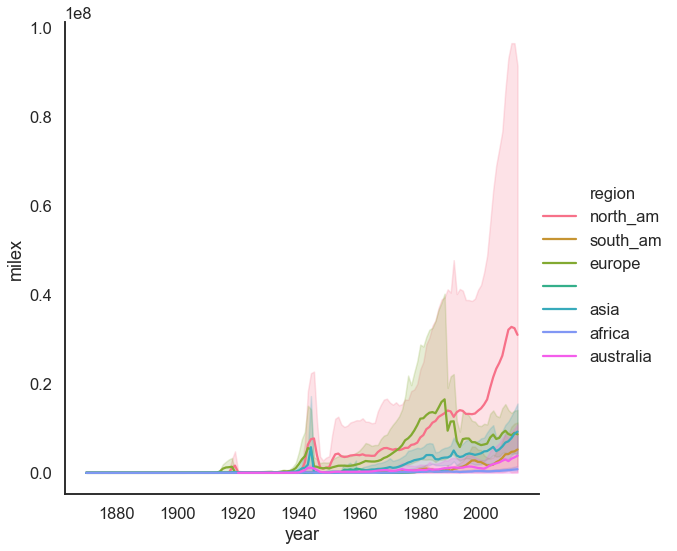

In [108]:
sns.relplot(x='year', y='milex', kind='line', hue='region', height=8, data=df.dropna())


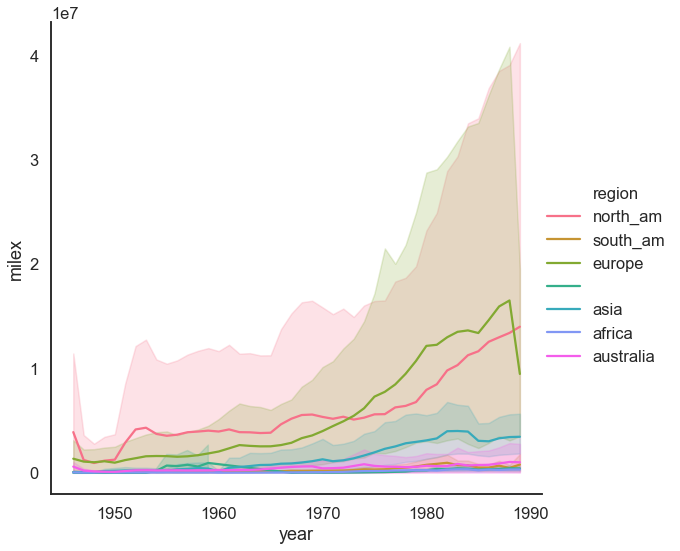

In [119]:
sns.relplot(x='year', y='milex', kind='line', hue='region', height=8, data=cw_df.dropna())
plt.show()

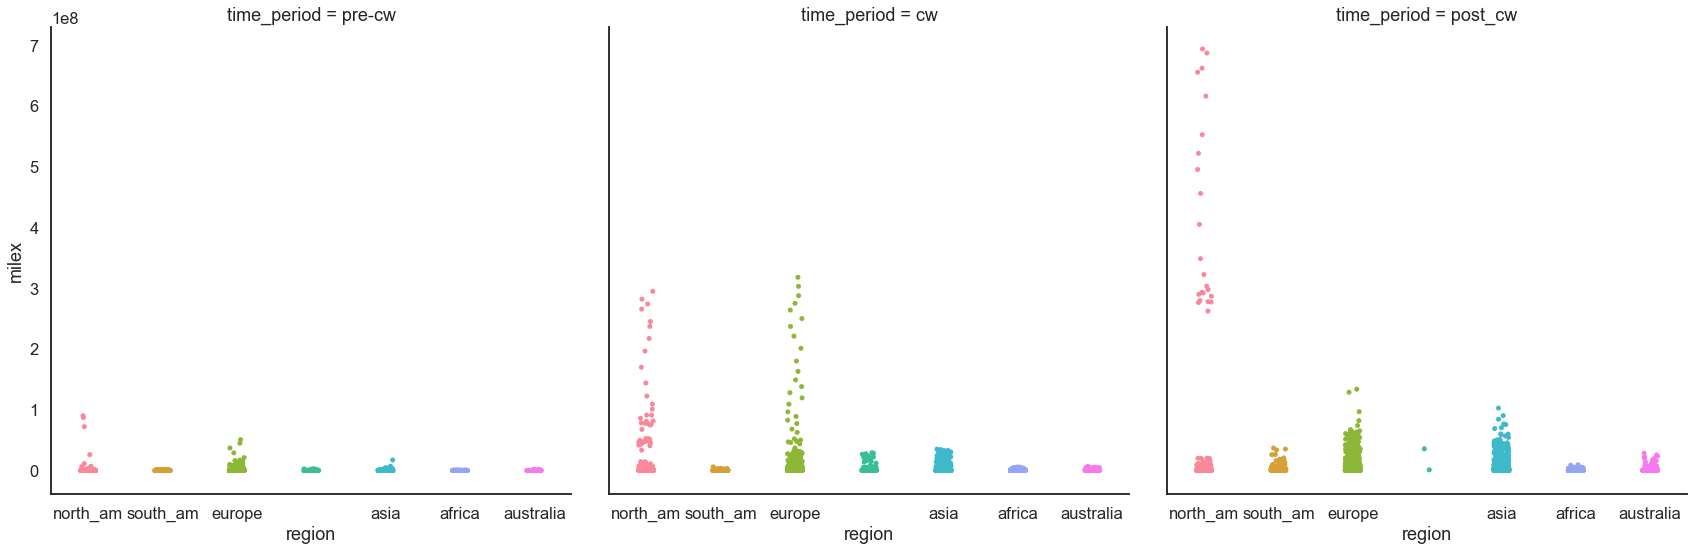

In [128]:
sns.catplot(x="region", y="milex", col='time_period', height=8, 
            data=df);

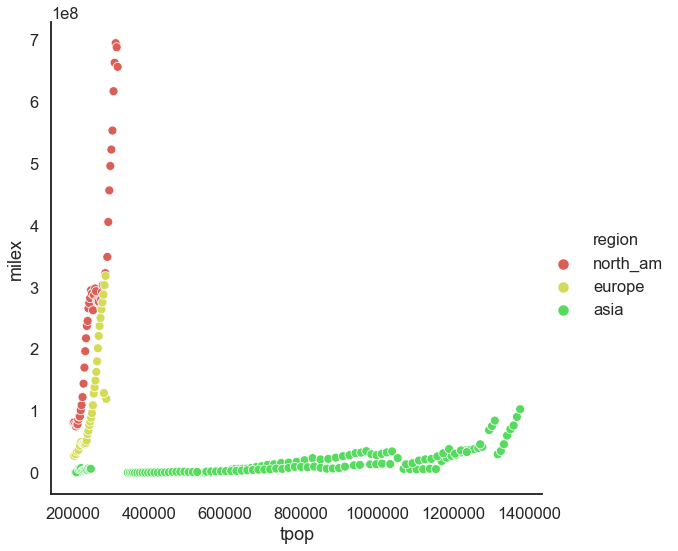

In [114]:
sns.relplot(x='tpop', y='milex', height=8,hue='region', data=bigpop)

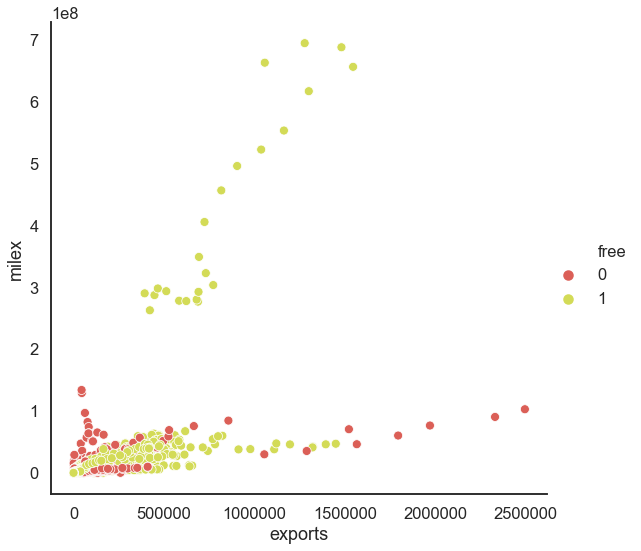

In [158]:
sns.relplot(x='exports', y='milex', height=8, hue='free', data=post_cw_df.dropna())

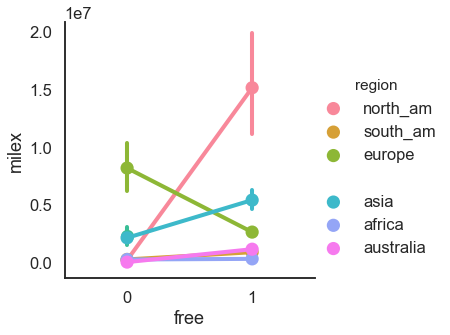

In [143]:
sns.catplot(x='free', y='milex', kind='point', hue='region', data=df)

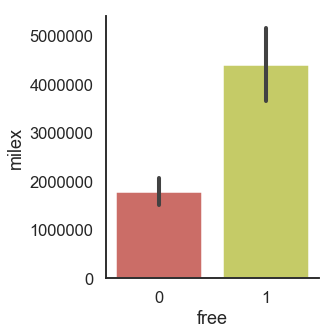

In [156]:
sns.catplot(x='free', y='milex', kind='bar', data=df)

## Remove USA

In [181]:
nousa_df = df[df.statename != 'United States of America']

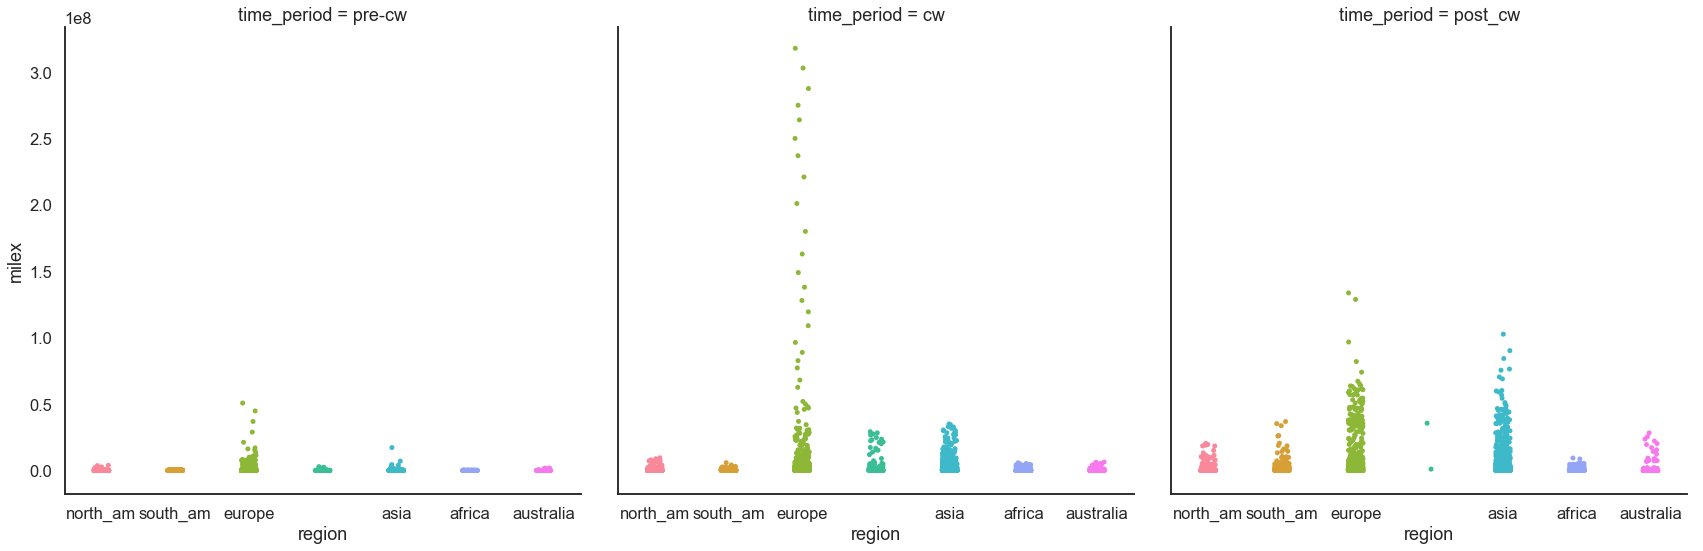

In [176]:
sns.catplot(x="region", y="milex", col='time_period', height=8, 
            data=nousa_df);

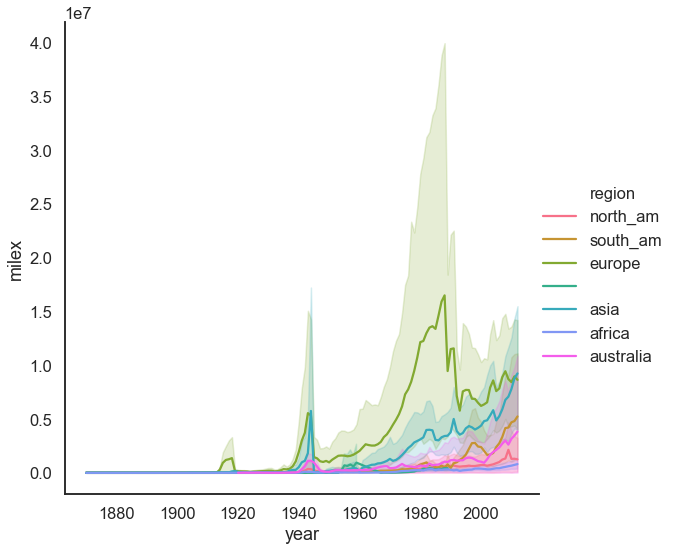

In [177]:
sns.relplot(x='year', y='milex', kind='line', hue='region', height=8, data=nousa_df.dropna())

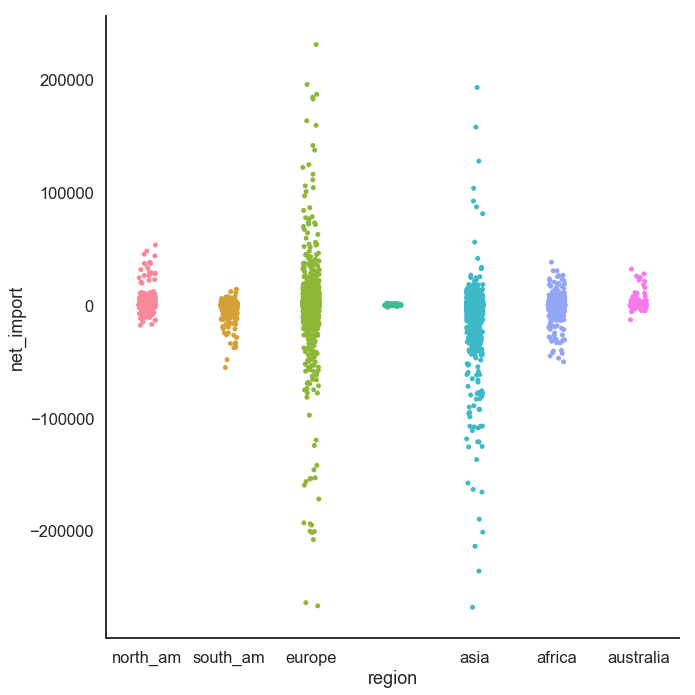

In [178]:
sns.catplot(x="region", y="net_import", height=10,data=nousa_df.dropna());

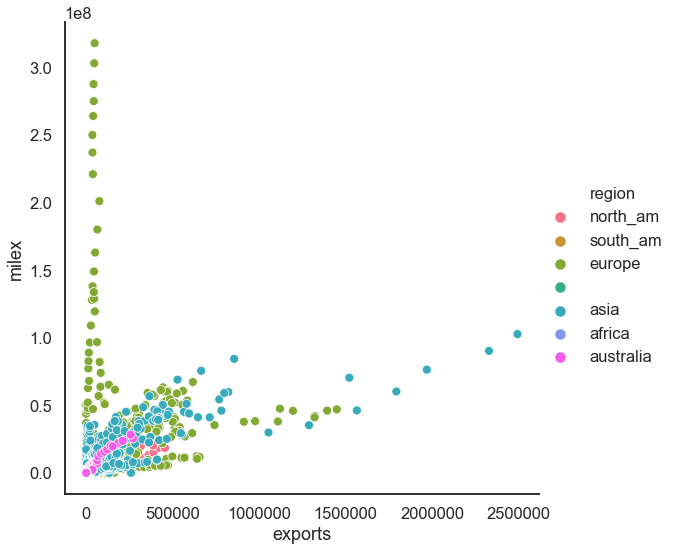

In [184]:
sns.relplot(x='exports', y='milex', height=8, hue='region', data=nousa_df.dropna())

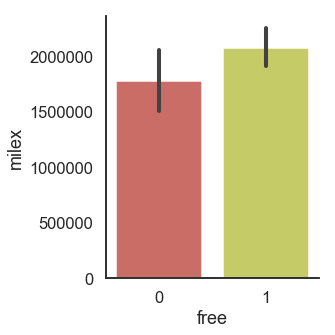

In [188]:
sns.catplot(x='free', y='milex', kind='bar', data=nousa_df)

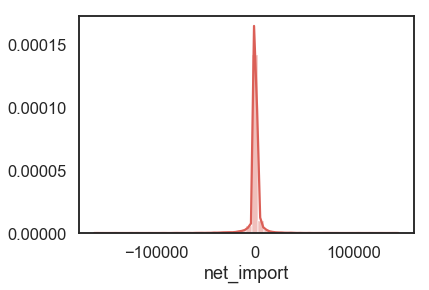

In [193]:
no_nousa_df = nousa_df[np.abs(nousa_df.milex-nousa_df.milex.mean()) <= (3*nousa_df.milex.std())]

sns.distplot(no_nousa_df['net_import'].dropna())

## Feature Selection

Based on the above data exploration, the best features to keep are:
- Time period (Pre-Cold War, Cold War, and Post-Cold War),
- Regions, and
- Net Imports

Free and Not Free states performed similarly after removing the USA. Actually, removing the US may serve as another useful feature. 




### Dataset credit:
Trade (Correlates of War) - 

Barbieri, Katherine and Omar M. G. Omar Keshk. 2016. Correlates of War Project Trade Data Set Codebook, Version 4.0. Online: http://correlatesofwar.org. 

Barbieri, Katherine, Omar M. G. Keshk, and Brian Pollins. 2009. “TRADING DATA: Evaluating our Assumptions and Coding Rules.” Conflict Management and Peace Science. 26(5): 471-491.

National Material Capabilities - 
Singer, J. David, Stuart Bremer, and John Stuckey. (1972). "Capability Distribution, Uncertainty, and Major Power War, 1820-1965." in Bruce Russett (ed) Peace, War, and Numbers, Beverly Hills: Sage, 19-48. 
